In [70]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [71]:
s = pd.read_json('arxiv-metadata-oai-2019.json',orient = 'records',lines = True)# 读取数据集

In [72]:
data = pd.DataFrame(s)# 转化为分析结构

In [73]:
data.head() #看看转化后的数据结构

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0297,Sung-Chul Yoon,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...",Remnant evolution after a carbon-oxygen white ...,"15 pages, 15 figures, 3 tables, submitted to M...",None,10.1111/j.1365-2966.2007.12161.x,None,astro-ph,None,We systematically explore the evolution of t...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,..."
1,0704.0342,Patrice Ntumba Pungu,B. Dugmore and PP. Ntumba,Cofibrations in the Category of Frolicher Spac...,27 pages,None,None,None,math.AT,None,Cofibrations are defined in the category of ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Dugmore, B., ], [Ntumba, PP., ]]"
2,0704.0360,Zaqarashvili,T.V. Zaqarashvili and K Murawski,Torsional oscillations of longitudinally inhom...,"6 pages, 3 figures, accepted in A&A",None,10.1051/0004-6361:20077246,None,astro-ph,None,We explore the effect of an inhomogeneous ma...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Zaqarashvili, T. V., ], [Murawski, K, ]]"
3,0704.0525,"Sezgin Ayg\""un","Sezgin Aygun, Ismail Tarhan, Husnu Baysal",On the Energy-Momentum Problem in Static Einst...,This submission has been withdrawn by arXiv ad...,"Chin.Phys.Lett.24:355-358,2007",10.1088/0256-307X/24/2/015,None,gr-qc,None,This paper has been removed by arXiv adminis...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2019-10-21,"[[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa..."
4,0704.0535,Antonio Pipino,"Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...",The Formation of Globular Cluster Systems in M...,"32 pages (referee format), 9 figures, ApJ acce...","Astrophys.J.665:295-305,2007",10.1086/519546,None,astro-ph,None,The most massive elliptical galaxies show a ...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2019-08-19,"[[Pipino, Antonio, ], [Puzia, Thomas H., ], [M..."


In [74]:
data["categories"].describe()  # 看一下有种类数据

count     170618
unique     15592
top        cs.CV
freq        5559
Name: categories, dtype: object

In [69]:
unique_categories = set([i for l in [x.split(' ') for x in data["categories"]] for i in l])# 论文种类去重
len(unique_categories)

172

In [76]:
data['years'] = pd.to_datetime(data['update_date']).dt.year# 将字符串时间转化为pd时间格式，新建一列时间列
data

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,years
0,0704.0297,Sung-Chul Yoon,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...",Remnant evolution after a carbon-oxygen white ...,"15 pages, 15 figures, 3 tables, submitted to M...",None,10.1111/j.1365-2966.2007.12161.x,None,astro-ph,None,We systematically explore the evolution of t...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,...",2019
1,0704.0342,Patrice Ntumba Pungu,B. Dugmore and PP. Ntumba,Cofibrations in the Category of Frolicher Spac...,27 pages,None,None,None,math.AT,None,Cofibrations are defined in the category of ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Dugmore, B., ], [Ntumba, PP., ]]",2019
2,0704.0360,Zaqarashvili,T.V. Zaqarashvili and K Murawski,Torsional oscillations of longitudinally inhom...,"6 pages, 3 figures, accepted in A&A",None,10.1051/0004-6361:20077246,None,astro-ph,None,We explore the effect of an inhomogeneous ma...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Zaqarashvili, T. V., ], [Murawski, K, ]]",2019
3,0704.0525,"Sezgin Ayg\""un","Sezgin Aygun, Ismail Tarhan, Husnu Baysal",On the Energy-Momentum Problem in Static Einst...,This submission has been withdrawn by arXiv ad...,"Chin.Phys.Lett.24:355-358,2007",10.1088/0256-307X/24/2/015,None,gr-qc,None,This paper has been removed by arXiv adminis...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2019-10-21,"[[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa...",2019
4,0704.0535,Antonio Pipino,"Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...",The Formation of Globular Cluster Systems in M...,"32 pages (referee format), 9 figures, ApJ acce...","Astrophys.J.665:295-305,2007",10.1086/519546,None,astro-ph,None,The most massive elliptical galaxies show a ...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2019-08-19,"[[Pipino, Antonio, ], [Puzia, Thomas H., ], [M...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170613,quant-ph/9904032,Mikhail Lukin,"V. A. Sautenkov, M. D. Lukin, C. J. Bednar, G....",Enhancement of Magneto-Optic Effects via Large...,None,None,10.1103/PhysRevA.62.023810,None,quant-ph,None,We utilize the generation of large atomic co...,"[{'version': 'v1', 'created': 'Thu, 8 Apr 1999...",2019-08-17,"[[Sautenkov, V. A., ], [Lukin, M. D., ], [Bedn...",2019
170614,solv-int/9511005,Wen-Xiu Ma,"Wen-Xiu Ma, Benno Fuchssteiner",Explicit and Exact Solutions to a Kolmogorov-P...,"14pages, Latex, to appear in Intern. J. Nonlin...",None,10.1016/0020-7462(95)00064-X,None,solv-int nlin.SI,None,Some explicit traveling wave solutions to a ...,"[{'version': 'v1', 'created': 'Tue, 14 Nov 199...",2019-08-15,"[[Ma, Wen-Xiu, ], [Fuchssteiner, Benno, ]]",2019
170615,solv-int/9809008,Victor Enolskii,"J C Eilbeck, V Z Enol'skii, V B Kuznetsov, D V...",Linear r-Matrix Algebra for a Hierarchy of One...,"plain LaTeX, 28 pages",None,None,None,solv-int nlin.SI,None,We consider a hierarchy of many-particle sys...,"[{'version': 'v1', 'created': 'Wed, 2 Sep 1998...",2019-08-17,"[[Eilbeck, J C, ], [Enol'skii, V Z, ], [Kuznet...",2019
170616,solv-int/9909010,Pierre van Moerbeke,"M. Adler, T. Shiota and P. van Moerbeke",Pfaff tau-functions,42 pages,None,None,None,solv-int adap-org hep-th nlin.AO nlin.SI,None,Consider the evolution $$ \frac{\pl m_\iy}{\...,"[{'version': 'v1', 'created': 'Wed, 15 Sep 199...",2019-08-17,"[[Adler, M., ], [Shiota, T., ], [van Moerbeke,...",2019


In [77]:
#爬取所有的类别
website_url = requests.get('https://arxiv.org/category_taxonomy').text #获取网页的文本数据
soup = BeautifulSoup(website_url) #爬取数据，这里使用lxml的解析器，加速
root = soup.find('div',{'id':'category_taxonomy_list'}) #找出 BeautifulSoup 对应的标签入口
tags = root.find_all(['h2','h3','h4','p'], recursive=True) #读取 tags

#初始化 str 和 list 变量
level_1_name = ''
level_2_name = ''
level_2_code = ''
level_1_names = []
level_2_codes = []
level_2_names = []
level_3_codes = []
level_3_names = []
level_3_notes = []

#进行
for t in tags:
    if t.name == "h2":
        level_1_name = t.text    
        level_2_code = t.text
        level_2_name = t.text
    elif t.name == "h3":
        raw = t.text
        level_2_code = re.sub(r"(.*)\((.*)\)",r"\2",raw) #正则表达式：模式字符串：(.*)\((.*)\)；被替换字符串"\2"；被处理字符串：raw
        level_2_name = re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name == "h4":
        raw = t.text
        level_3_code = re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name = re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name == "p":
        notes = t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)
        level_3_notes.append(notes)

#根据以上信息生成dataframe格式的数据
df_taxonomy = pd.DataFrame({
    'group_name' : level_1_names,
    'archive_name' : level_2_names,
    'archive_id' : level_2_codes,
    'category_name' : level_3_names,
    'paper_field' : level_3_codes,
    'category_description': level_3_notes
    
})

#按照 "group_name" 进行分组，在组内使用 "archive_name" 进行排序
df_taxonomy.groupby(["group_name","archive_name"])
df_taxonomy = df_taxonomy[df_taxonomy['paper_field'].str.startswith('cs.')]
df_taxonomy

,group_name,archive_name,archive_id,category_name,paper_field,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
5,Computer Science,Computer Science,Computer Science,Computation and Language,cs.CL,Covers natural language processing. Roughly in...
6,Computer Science,Computer Science,Computer Science,Cryptography and Security,cs.CR,Covers all areas of cryptography and security ...
7,Computer Science,Computer Science,Computer Science,Computer Vision and Pattern Recognition,cs.CV,"Covers image processing, computer vision, patt..."
8,Computer Science,Computer Science,Computer Science,Computers and Society,cs.CY,"Covers impact of computers on society, compute..."
9,Computer Science,Computer Science,Computer Science,Databases,cs.DB,"Covers database management, datamining, and da..."


In [78]:
paper_field=[]
paper_num=[]
data_category_set=[]
for i in data['categories']:
    data_category_set.append(i.split(' '))
for i in unique_categories:
    p=0
    for j in data_category_set:
        for k in j:
            if k == i:
                p = p+1
            else:
                pass
    paper_field.append(i)
    paper_num.append(p)

dict={'paper_field':paper_field,
    'paper_num':paper_num}
paper_field_data = pd.DataFrame(dict)
paper_field_data = paper_field_data.sort_values(by='paper_field')
paper_field_data = paper_field_data[paper_field_data['paper_field'].str.startswith('cs.')]
paper_field_data = paper_field_data.sort_values(by='paper_num',ascending=False)
paper_field_data = paper_field_data.merge(df_taxonomy, on='paper_field', how='left')
paper_field_data = paper_field_data[['paper_field','paper_num','category_name']]
paper_field_data

,paper_field,paper_num,category_name
0,cs.LG,17372,Machine Learning
1,cs.CV,11168,Computer Vision and Pattern Recognition
2,cs.CL,5117,Computation and Language
3,cs.AI,4723,Artificial Intelligence
4,cs.IT,3568,Information Theory
5,cs.CR,2931,Cryptography and Security
6,cs.RO,2631,Robotics
7,cs.SY,2414,Systems and Control
8,cs.DS,2131,Data Structures and Algorithms
9,cs.DC,2025,"Distributed, Parallel, and Cluster Computing"


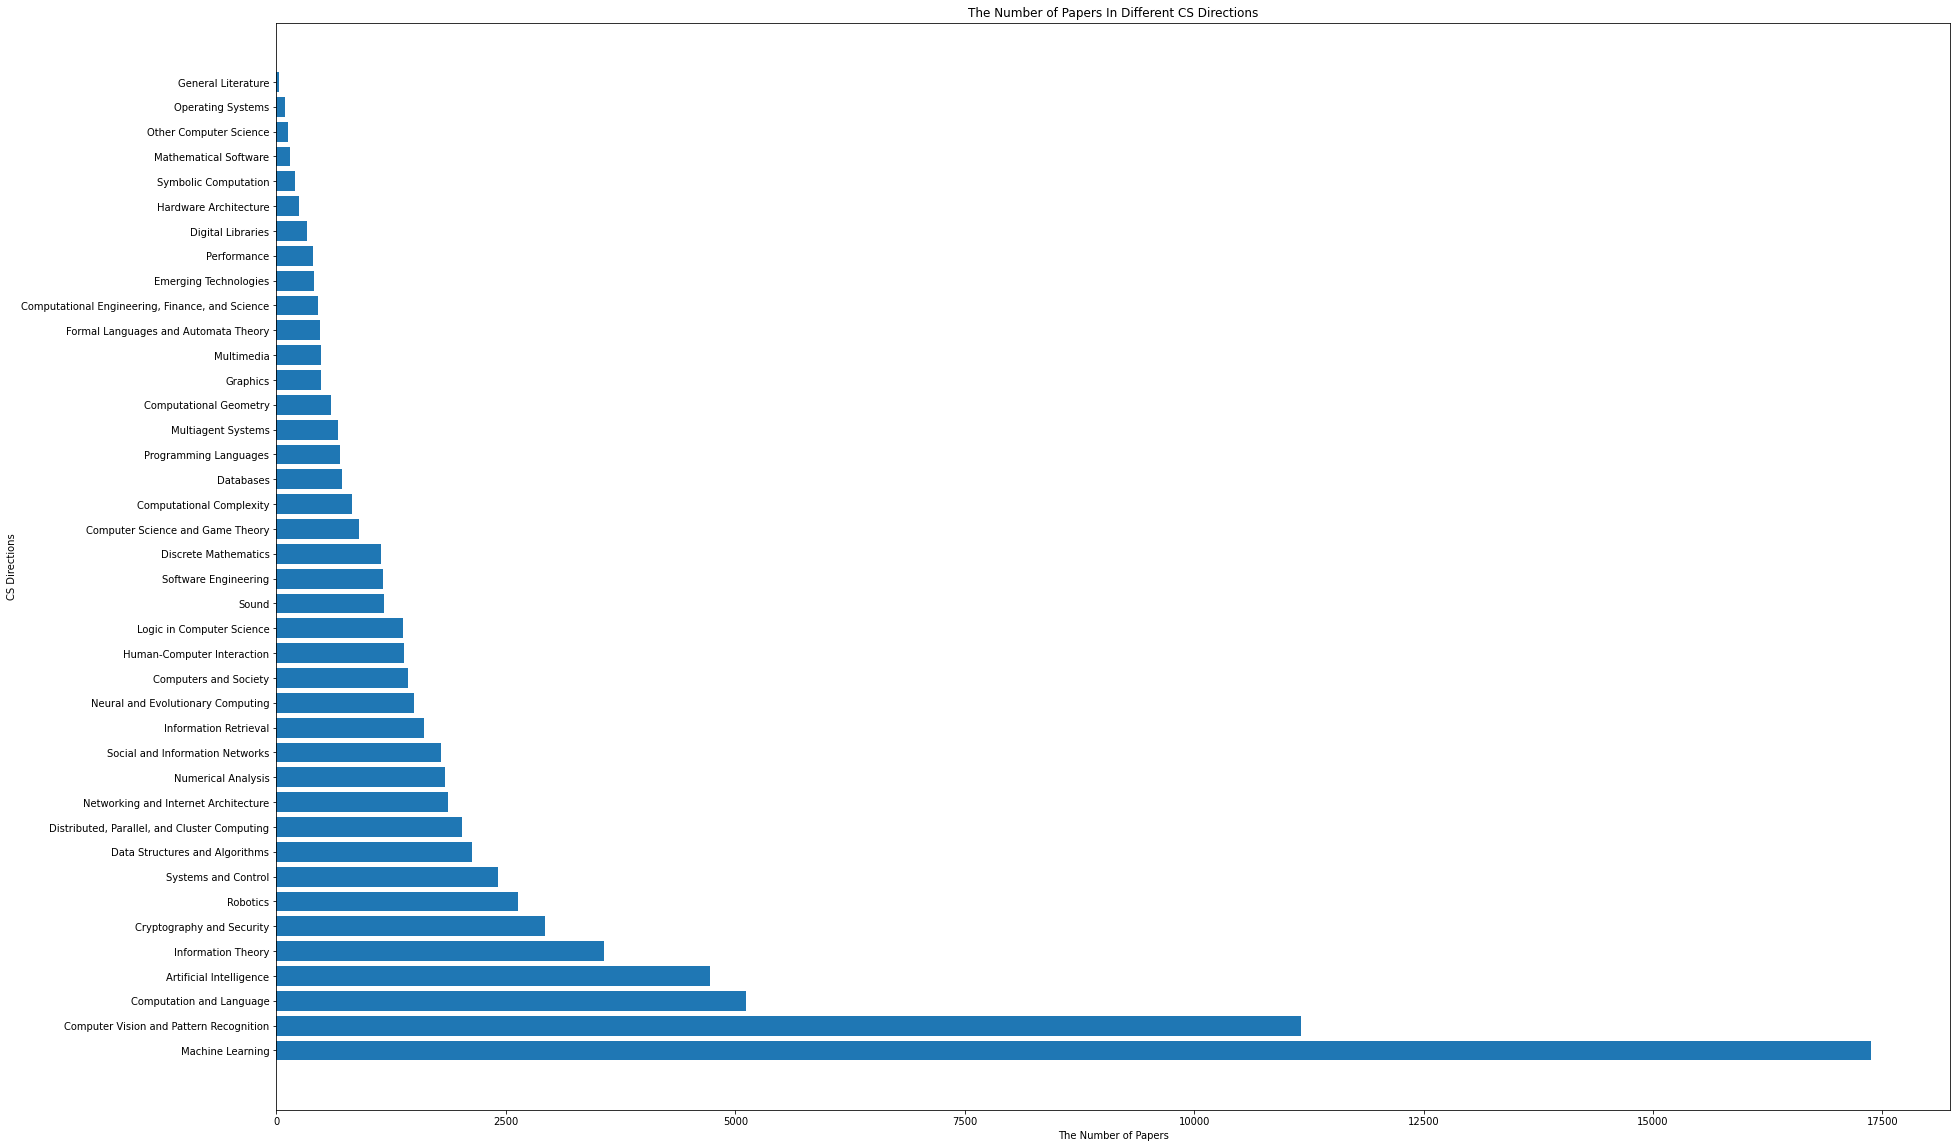

In [82]:
fig = plt.figure(figsize=(30,20))
barplot = plt.barh(paper_field_data['category_name'],paper_field_data['paper_num'])
plt.title("The Number of Papers In Different CS Directions")
plt.xlabel("The Number of Papers") #设置X轴Y轴名称 
plt.ylabel("CS Directions")
plt.show()